## Clustering exercises


### Get data

In this notebook we will try out clustering techniques on our fruit and mystery datasets. Let's start by loading in our data as before.

In [1]:
using JuliaDB, MNIST 

rescale(A, dim::Integer=1) = (A .- mean(A, dim)) ./ max.(std(A, dim), eps())

# Fruit dataset
fruit_table = loadtable(["../training/data/Apple_Golden_1.dat","../training/data/bananas.dat"]; delim = '\t', filenamecol=:apple => (x) -> x == "../training/data/Apple_Golden_1.dat" ? true : false)

matdata = hcat(columns(fruit_table)...)
fruit_data = rescale(matdata[:,2:end], 1)
fruit_labels = ifelse.(matdata[:,1].==1, "Apple","Banana")

# Mystery dataset
mystery_data, labels = traindata()
N = 2500
mystery_data = rescale(convert(Matrix{Float64}, mystery_data[:, 1:N])',1)
mystery_labels = Int.(labels)[1:N];

For plotting purposes, let's keep our PCA results from the last notebook around (for plotting our data along the axes with the greatest variation to visualize clusterings).

In [2]:
using MultivariateStats
M = fit(PCA, fruit_data', maxoutdim = 4)
fruit_PCA = transform(M, fruit_data')'
M1 = fit(PCA, mystery_data')
mystery_PCA = transform(M1, mystery_data')';

### K-means

Let's use `kmeans` from the `Clustering` package to find the natural groupings in that dataset. Recall that `k`, the number of clusters has to be chosen by the user. Since we know we have apples and bananas, choose `k=2` and plot the different clusters in different colors.

#### Solution

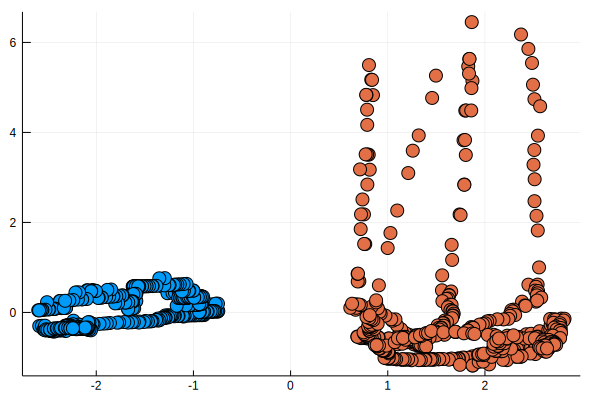

In [3]:
using Clustering, Plots
gr()

clusters = kmeans(fruit_data',2)
scatter(fruit_PCA[:,1], fruit_PCA[:,2], group = clusters.assignments, legend=false, markersize=7)

Notice that here the clusters found the two groups: the apples and the bananas. It doesn't know which is which, but after labeling our data we can go back in and see what it found. 

However, with our mystery data we don't know how many clusters there are. So let's try some different values of `k` and see how it looks.

Try `k = 2, 5, 10, 15` and plot the results. Are you able to see if this clustering seems to be working?

#### Solution

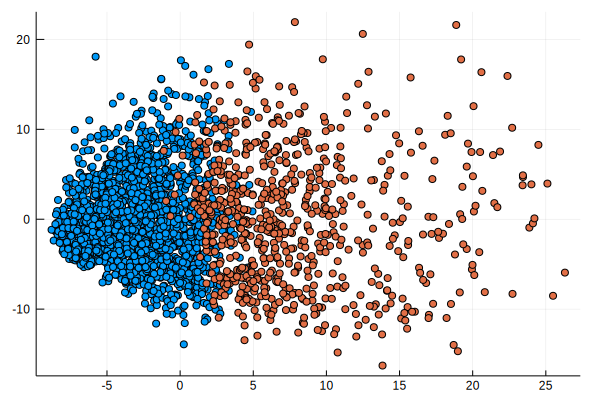

In [4]:
clusters = kmeans(mystery_data',2)
scatter(mystery_PCA[:,1], mystery_PCA[:,2], group = clusters.assignments, legend = false)

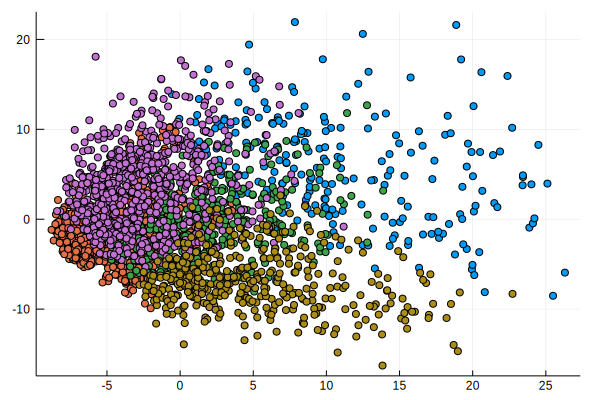

In [5]:
clusters = kmeans(mystery_data',5)
scatter(mystery_PCA[:,1], mystery_PCA[:,2], group = clusters.assignments, legend = false)

2 clusters doesn't look great! Let's try 5.

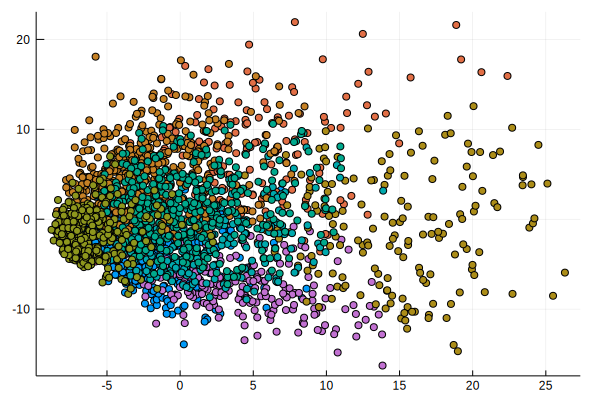

In [6]:
clusters = kmeans(mystery_data',10)
scatter(mystery_PCA[:,1], mystery_PCA[:,2], group = clusters.assignments, legend = false)

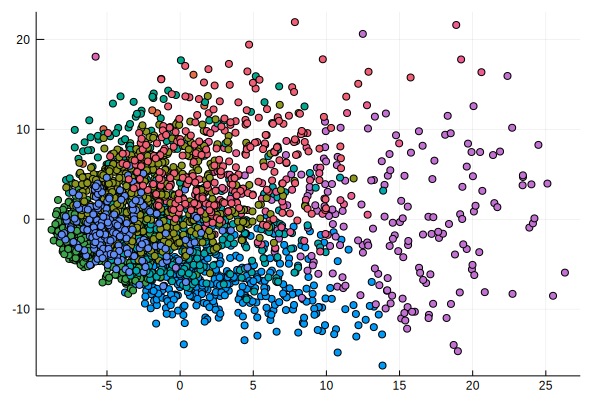

In [7]:
clusters = kmeans(mystery_data',15)
scatter(mystery_PCA[:,1], mystery_PCA[:,2], group = clusters.assignments, legend = false)

Because the data is so muddled, it's hard to tell if clustering is working well, or how many clusters might be giving us an accurate grouping of our data.

#### Elbow method

One way to choose the number of clusters is to use the *elbow method*. Like visual inspection of our cluster results, the elbow method is not very rigorous, but sometimes it can give us a bit more information.

The idea is that our clustering has done well if we have (1) minimized the distance between cluster centers and data points associated with that cluster and (2) maximized the distance between cluster centers. 

The output object of `kmeans` has fields called `costs` and `totalcost`:

```julia
out = kmeans(somedata, k)
costs = out.costs
totalcost = out.totalcost
```

The `totalcost` is the sum of distances of all points in the dataset from their respective cluster centers. We can plot how this value changes as the number of cluster centers increases to choose `k`. The hope is that our ideal `k` will be the value at which there is an **elbow** in the `total_cost` vs. `k` curve, i.e. where decreases in `total_cost` fall off.

Why can't we simply minimize the distance between data points and their cluster centers?

Plot `total_cost` vs. `k` for values of `k` between 2 and 30.

Are you able to tell how many clusters you want?

#### Solution

In [8]:
# If we simply minimized the cost, our solution would be to have `k == N` where N is the number of points in our dataset.

costs = []
sizes = 2:30
for csize in sizes    
    clusters = kmeans(mystery_data', csize)
    push!(costs, sum(abs2, clusters.costs))
end

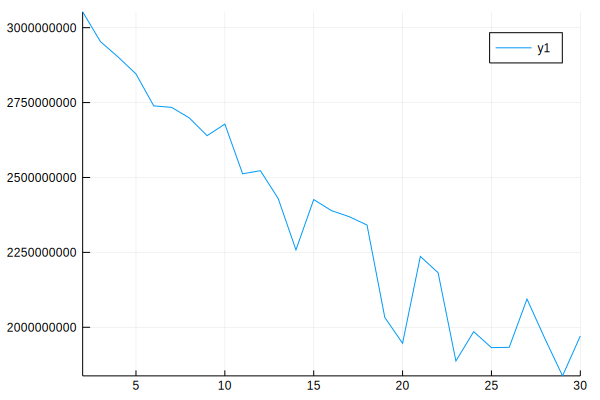

In [9]:
plot(sizes, costs)

Unfortunately we don't seem to be able to learn much about our `mystery_data` from the elbow method. Maybe kmeans is not the best approach to deal with this dataset.